In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime
import numpy as np
import matplotlib as mpl
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#Meldunki
df = pd.read_csv("Meldunki 2007-2020 poprawione.csv")
df.head()

,Date,Year,Range,Amount,Dolnośląskie,Kujawsko-Pomorski,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
0,2007-12-23,2007,12D,4044,256,54,23,7,468,498,1547,363,27,38,54,213,30,81,39,299
1,2007-12-16,2007,12C,5274,292,58,27,2,685,633,1983,632,11,48,58,398,4,138,110,253
2,2007-12-08,2007,12B,6091,461,30,28,18,892,763,2303,479,12,39,30,539,5,211,99,206
3,2007-12-01,2007,12A,6442,326,64,26,51,925,809,2581,459,14,44,64,531,5,200,115,232
4,2007-11-23,2007,11D,6904,253,71,23,11,840,1083,2957,494,32,42,71,548,12,240,82,175


In [3]:
df.shape

(585, 20)

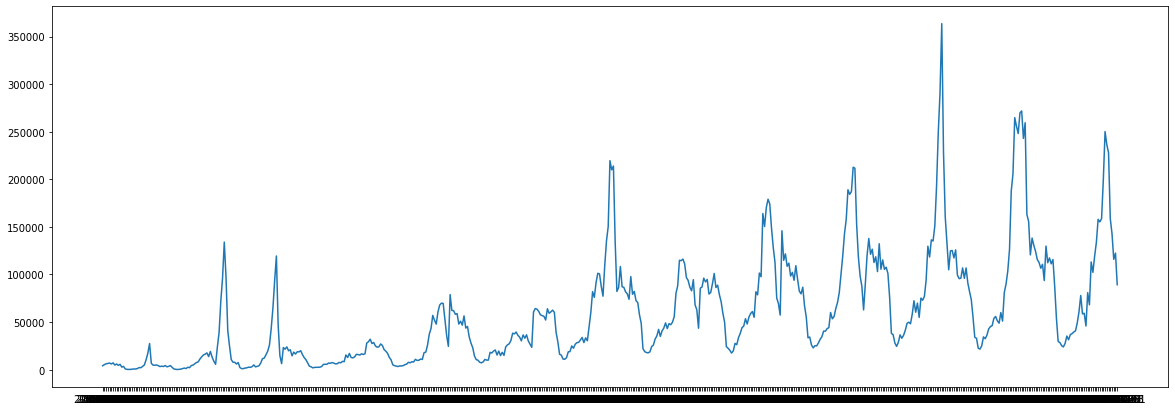

In [4]:
plt.figure(figsize=(20,7))
plt.plot("Date", "Amount", data=df)
plt.show()    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


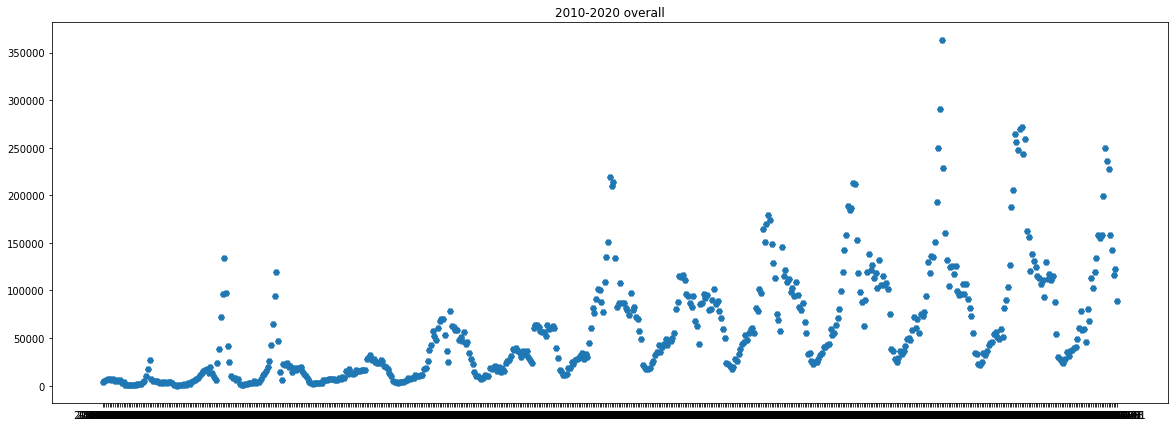

In [5]:
plt.figure(figsize=(20,7))
plt.title("2010-2020 overall")
plt.plot_date(df.Date, df.Amount, fmt='H')

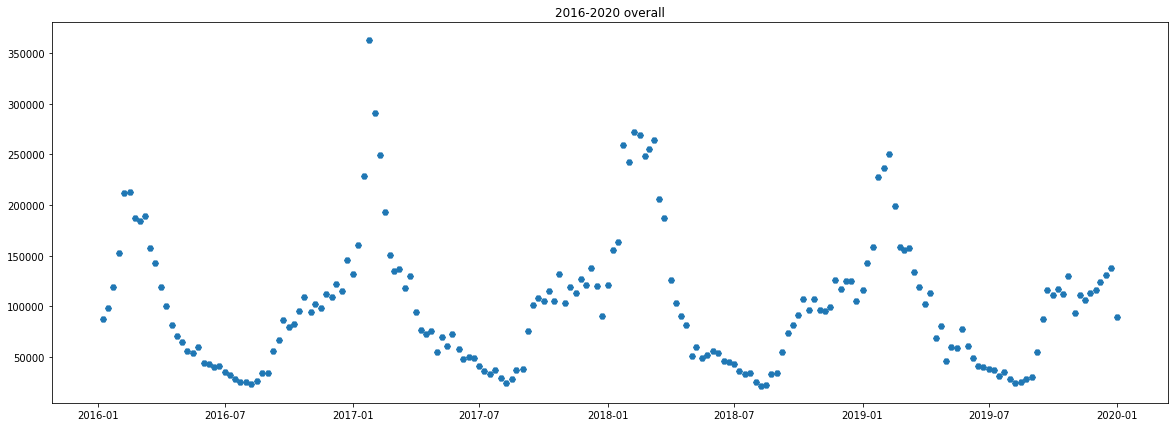

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df['Date'] = pd.to_datetime(df['Date'])  

date1 = datetime.strptime("20000101", "%Y%m%d")
date2 = datetime.strptime("20200101", "%Y%m%d")

mask = df[(df['Date'] > '2016-01-01') & (df['Date'] <= '2020-01-01')]

plt.figure(figsize=(20,7))
plt.title("2016-2020 overall")
plt.plot_date(mask.Date, mask.Amount, fmt='H')

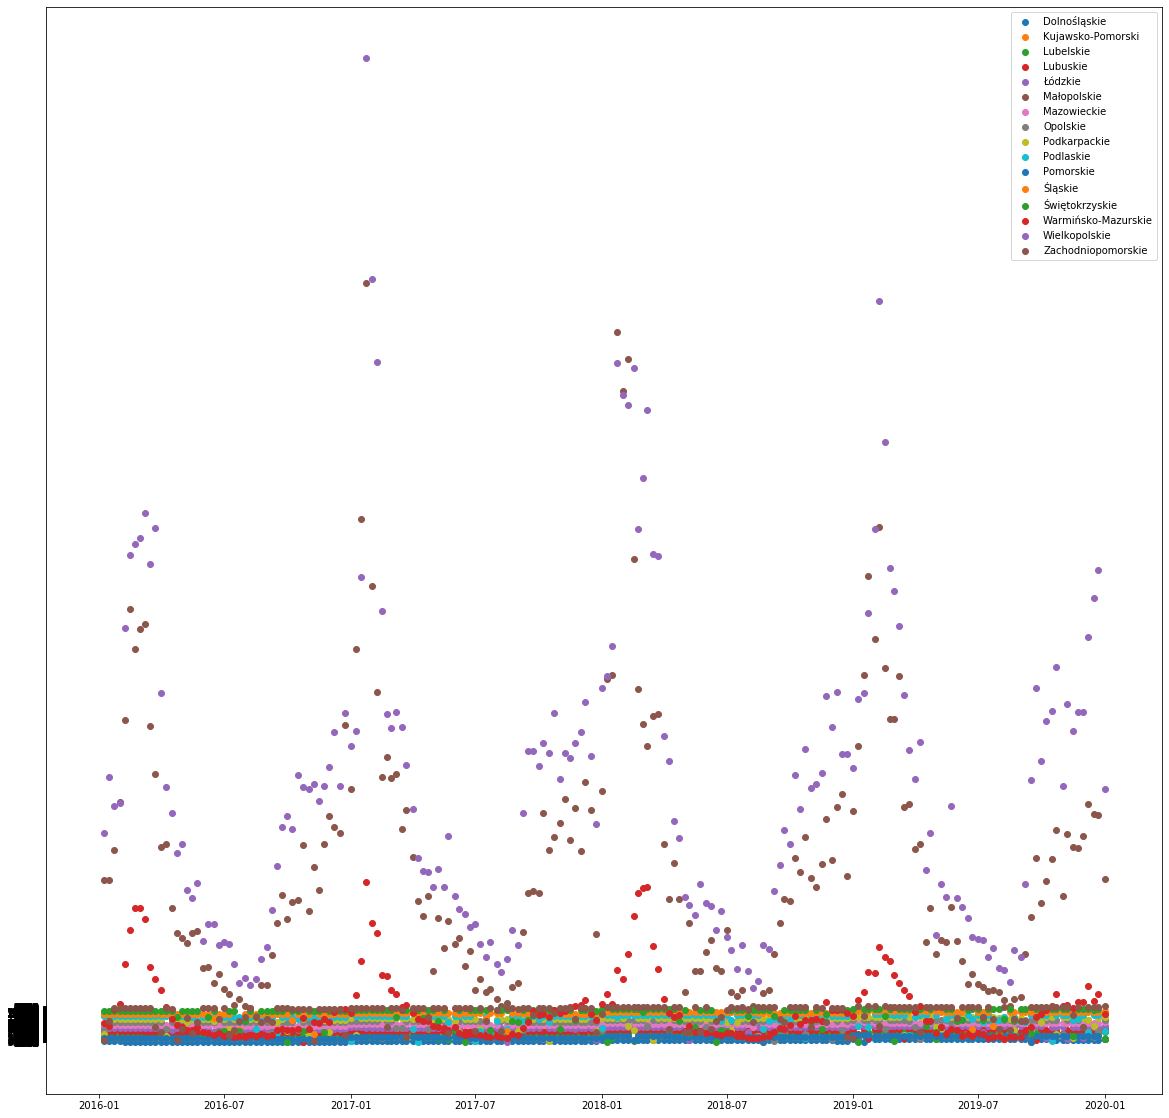

In [7]:
plt.figure(figsize=(20,20))

kol = mask.columns

for i in range(0,16):
    plt.scatter(mask.Date, mask[kol[i+4]])
    plt.legend(mask.iloc[:, 4+i:5+i].columns, loc="upper left")

# plt.ylim(100,2000)
plt.legend(mask.iloc[:, 4:20])

In [8]:
df_synop = pd.read_csv("Synop.csv", header=None)
df_synop.shape

(1829, 65)

In [9]:
df_synop.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,349190600,BIELSKO-BIAŁA,2019,1,1,5.4,NaN,0.0,NaN,3.1,...,NaN,0,NaN,R,0,9.0,0,9.0,0,8
1,349190600,BIELSKO-BIAŁA,2019,1,2,5.5,NaN,-2.2,NaN,-0.7,...,NaN,0,NaN,R,0,9.0,0,9.0,0,8
2,349190600,BIELSKO-BIAŁA,2019,1,3,-2.0,NaN,-4.9,NaN,-4.3,...,NaN,0,NaN,Z,1,NaN,0,9.0,0,8
3,349190600,BIELSKO-BIAŁA,2019,1,4,-2.6,NaN,-5.3,NaN,-4.1,...,NaN,0,NaN,Z,1,NaN,0,9.0,0,8
4,349190600,BIELSKO-BIAŁA,2019,1,5,1.0,NaN,-3.2,NaN,0.1,...,NaN,0,NaN,R,0,9.0,0,9.0,0,8


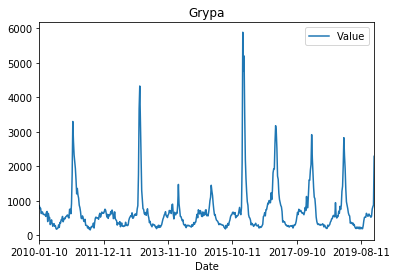

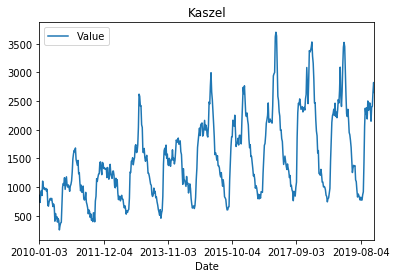

In [10]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
series = read_csv('trends.csv', header=0)
series=series[series.Token=="grypa"]
series.plot(x="Date", y="Value", title="Grypa")
series = read_csv('trends.csv', header=0)
series=series[series.Token=="kaszel"]
series.plot(x="Date", y="Value", title="Kaszel")
pyplot.show()

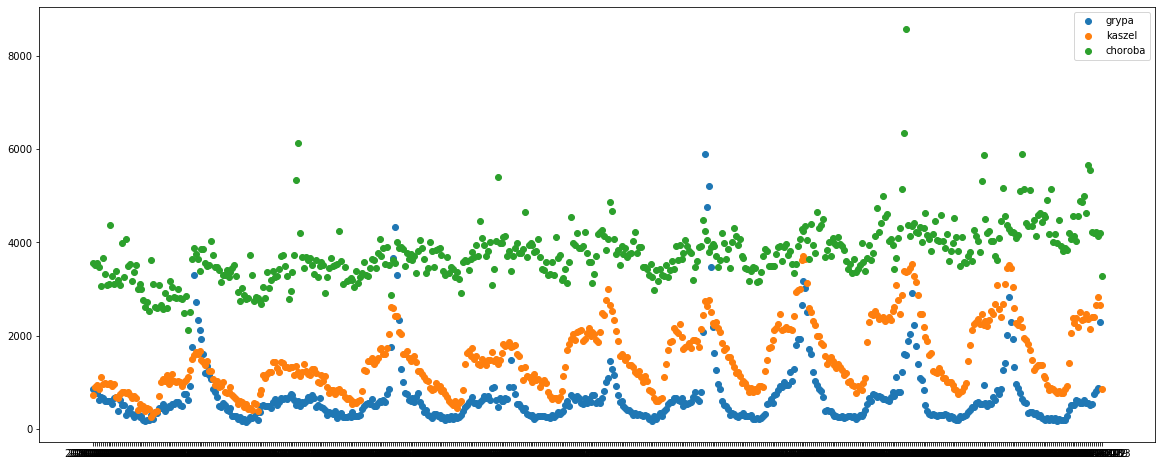

In [11]:
trends = read_csv('trends.csv', header=0)
token = ['grypa', 'kaszel', 'choroba']
plt.figure(figsize=(20,8))

for i in range(0,2+1):
    plt.scatter(trends.Date[trends.Token==token[i]], trends.Value[trends.Token==token[i]])
    
# plt.ylim(100,2000)
plt.legend(['grypa', 'kaszel', 'choroba'])        

In [12]:
#######Divided for months
# plt.figure(figsize=(15,8), dpi= 80)
# series['year'] = [d.year for d in series.Date]
# series['month'] = [d.strftime('%b') for d in series.Date]
# years = series['year'].unique()

# for i, y in enumerate(years):
#     if i > 0:        
#         plt.plot('month', 'Value', data=series.loc[series.year==y, :], label=y)
#         plt.text(series.loc[series.year==y, :].shape[0]-.9, series.loc[series.year==y, 'Value'][-1:].values[0], y, fontsize=12)   

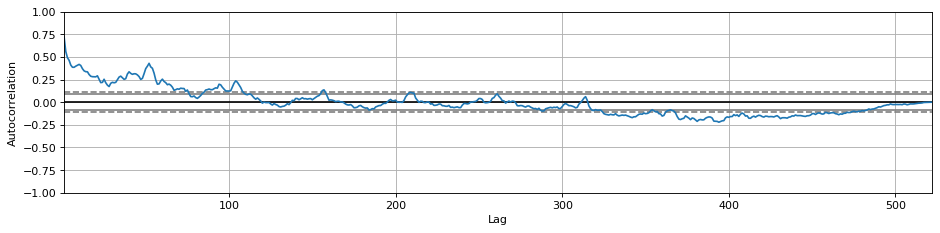

In [13]:
### ARIMA  p (AR), q (MA), d (differentiate)
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(14,3), dpi= 80)
autocorrelation_plot(trends[['Value']][trends.Token=="choroba"])
pyplot.show() #

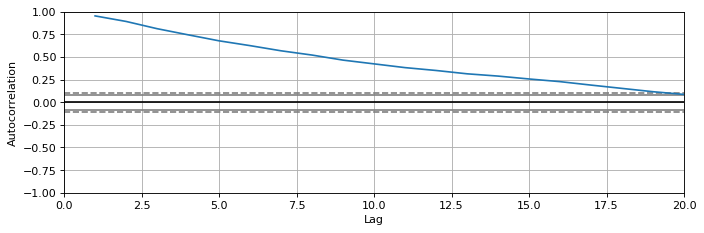

In [14]:
#ARIMA Meldunki
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(10,3), dpi= 80)

autocorrelation_plot(df[['Amount']])
pyplot.xlim(0,20)
pyplot.show() #

In [15]:
#SPLIT
df = df.sort_values(by="Date")
df_train = df[:535] #split to 2019
df_test = df[535:]

X_train = df_train['Amount'].values
X_test = df_test['Amount'].values

y_train = df_train['Date'].values
y_test = df_test['Date'].values

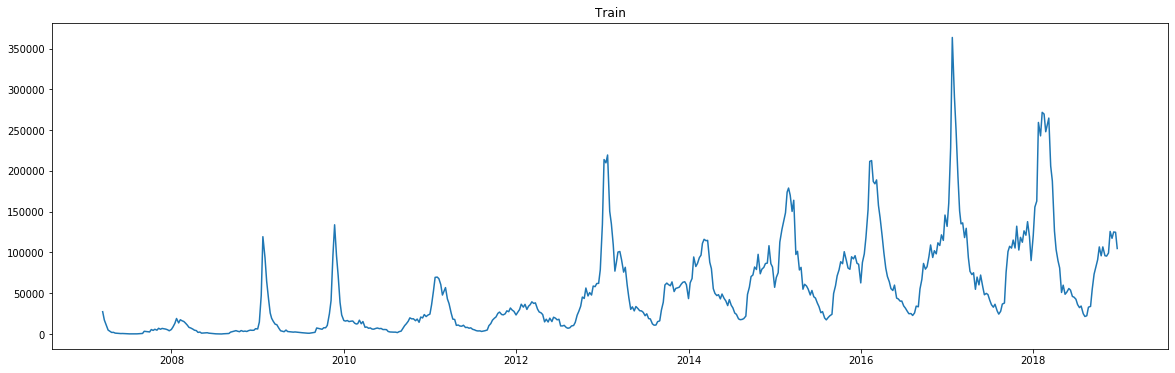

In [16]:
plt.figure(figsize=(20, 6))
plt.title("Train")
plt.plot(df_train["Date"], df_train["Amount"])

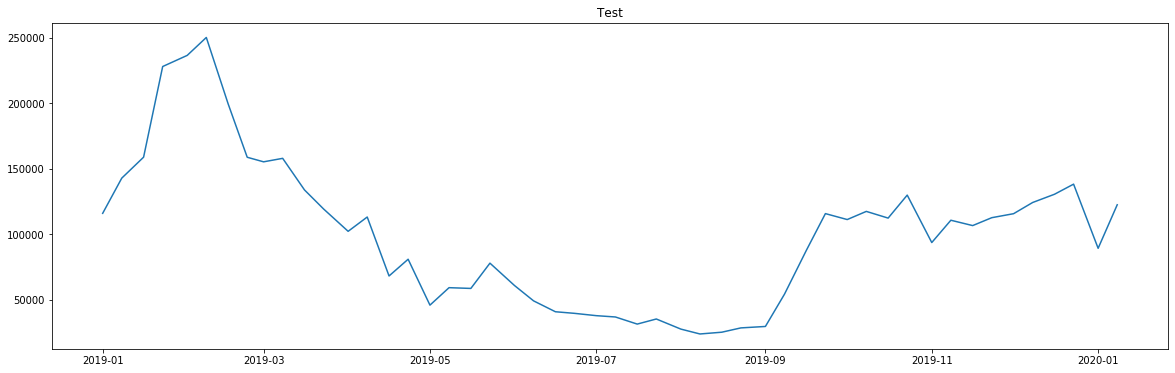

In [17]:
plt.figure(figsize=(20, 6))
plt.title("Test")
plt.plot(df_test["Date"], df_test["Amount"])


In [18]:
#Test AdFuller H0: proces niestacjonarny
from statsmodels.tsa.stattools import adfuller
from numpy import log

result1 = adfuller(df.Amount.dropna())
print('ADF Statistic ALL: %f' % result1[0])
print('p-value for whole process: %f' % result1[1])
result2 = adfuller(df_test["Amount"].dropna())
print('p-value for test: %f' % result2[1]) #Test need to be differentiate?

result3 = adfuller(df_train["Amount"].dropna())
print('p-value for train: %f' % result3[1])
#Proces stacjonarny, d=0

ADF Statistic ALL: -3.971622
p-value for whole process: 0.001567
p-value for test: 0.205945
p-value for train: 0.000690


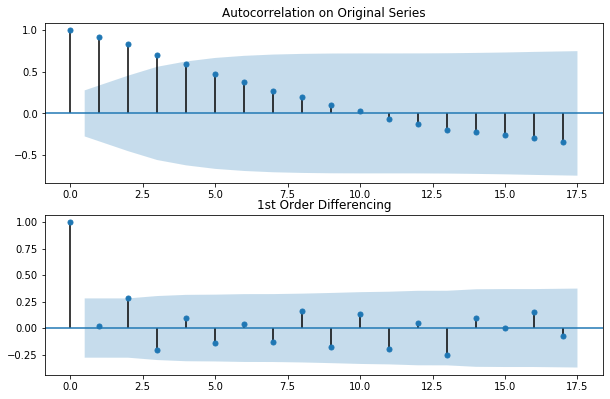

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(df_test["Amount"], ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(df_test["Amount"].diff().dropna(), ax=ax2, 
               title="1st Order Differencing")

In [20]:
model = ARIMA(df_train['Amount'], order=(3,0,2))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Amount   No. Observations:                  535
Model:                     ARMA(3, 2)   Log Likelihood               -5901.485
Method:                       css-mle   S.D. of innovations          14893.510
Date:                Mon, 27 Jan 2020   AIC                          11816.969
Time:                        11:51:19   BIC                          11846.945
Sample:                             0   HQIC                         11828.698
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.443e+04   1.05e+04      5.176      0.000    3.38e+04     7.5e+04
ar.L1.Amount     0.4810      0.092      5.249      0.000       0.301       0.661
ar.L2.Amount     0.9398      0.016     57.50

In [21]:
df_train[50:100]

,Date,Year,Range,Amount,Dolnośląskie,Kujawsko-Pomorski,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
43,2008-08-01,2008,08A,114,-,-,5,-,4,6,-,3,-,-,-,2,-,19,43,32
42,2008-08-08,2008,08B,333,-,-,4,1,6,29,185,-,-,23,-,6,-,19,27,33
41,2008-09-01,2008,09A,709,4,2,10,1,7,146,323,13,1,16,2,6,-,9,28,90
40,2008-09-08,2008,09B,2362,36,124,36,56,75,256,613,246,36,24,124,166,1,30,56,339
39,2008-10-01,2008,10A,4189,90,25,23,29,263,307,2472,149,8,48,25,187,3,105,87,311
38,2008-10-08,2008,10B,3467,163,5,36,10,447,174,1834,158,45,19,5,176,-,33,100,170
37,2008-10-16,2008,10C,2920,134,15,13,16,378,221,1312,171,43,34,15,196,4,93,65,128
36,2008-10-23,2008,10D,4305,153,30,27,11,627,397,1888,176,75,64,30,224,5,94,115,347
35,2008-11-01,2008,11A,3247,192,57,29,-,312,83,1674,261,15,-,57,151,6,66,104,232
34,2008-11-08,2008,11B,3644,254,37,27,2,370,311,1769,189,44,31,37,127,3,91,90,211


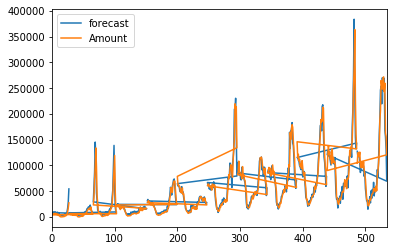

In [22]:
model_fit.plot_predict(dynamic=False)
plt.show()

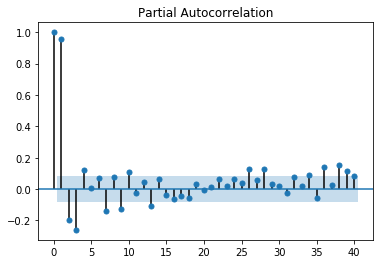

In [23]:
plot_pacf(df["Amount"].dropna(), lags=40)
plt.show() #2 above

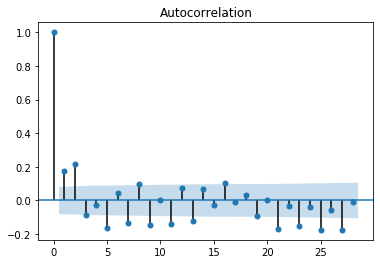

In [24]:
plot_acf(df["Amount"].diff().dropna())
plt.show() #3 above

In [25]:
df_test = df_test.sort_values(by="Date")

In [26]:
history = [x for x in X_train]
predictions = []

def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat


for t in range(len(X_test)):
    model = ARIMA(history, order=(3, 0, 2)) #Determined by myself
    model_fit = model.fit(trend='nc', disp=False)
    ar_coef = model_fit.arparams
    yhat = predict(ar_coef, history)
    predictions.append(yhat)
    obs = X_test[t]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))

rmse = sqrt(mean_squared_error(X_test, predictions))
mse = (mean_squared_error(X_test, predictions))

print('Test RMSE: %.3f' % rmse)
print(mse)

#''' Dla 2,0,2  RMSE 20788.583 |MSE 432165165.664091 '''
#   dla 1,0,1   RMSE 16752.714  MSE 280653429.6304928
#(5, 0,1))      RMSE 19330.862 MSE 373682233.6341942

>predicted=109655.543, expected=115901.000
>predicted=95852.986, expected=142768.000
>predicted=127358.452, expected=158756.000
>predicted=155449.315, expected=227951.000
>predicted=191640.104, expected=236454.000
>predicted=255048.764, expected=250131.000
>predicted=237408.700, expected=199472.000
>predicted=222532.455, expected=158698.000
>predicted=148214.189, expected=155213.000
>predicted=153669.789, expected=157867.000
>predicted=147627.754, expected=133758.000
>predicted=141146.206, expected=119224.000
>predicted=110188.790, expected=102173.000
>predicted=99540.559, expected=113081.000
>predicted=94445.610, expected=68094.000
>predicted=92753.616, expected=80861.000
>predicted=49991.703, expected=45834.000
>predicted=67191.960, expected=59157.000
>predicted=33368.075, expected=58583.000
>predicted=62216.998, expected=77873.000
>predicted=64074.924, expected=60809.000
>predicted=75461.256, expected=49088.000
>predicted=44906.140, expected=40785.000
>predicted=37717.938, expected=

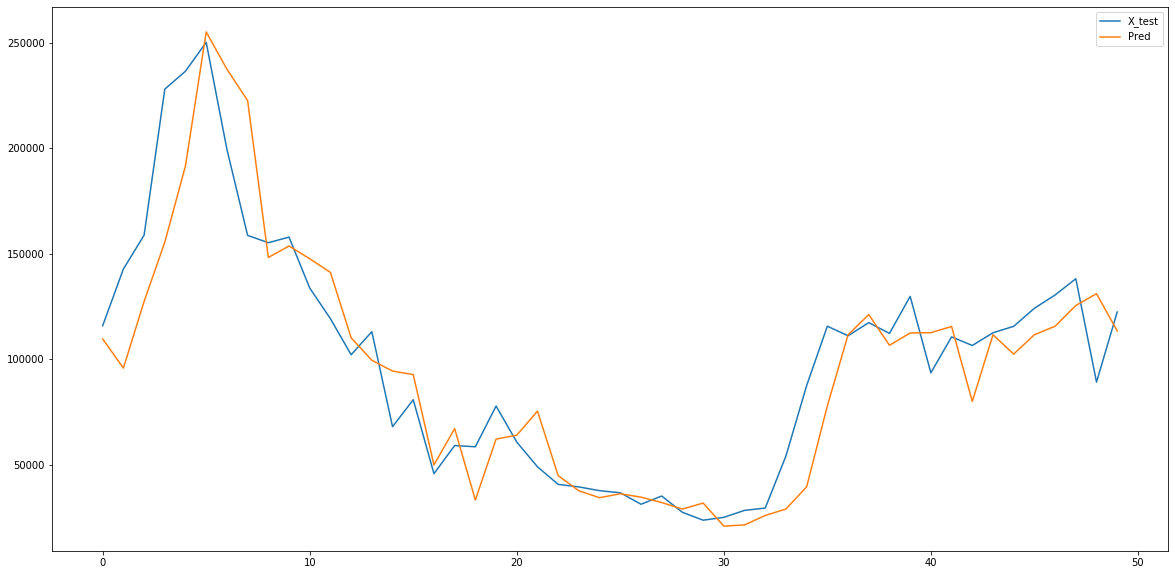

In [27]:
plt.figure(figsize=(20,10))

plt.plot(X_test)
plt.plot(predictions)
plt.legend(["X_test", "Pred"])

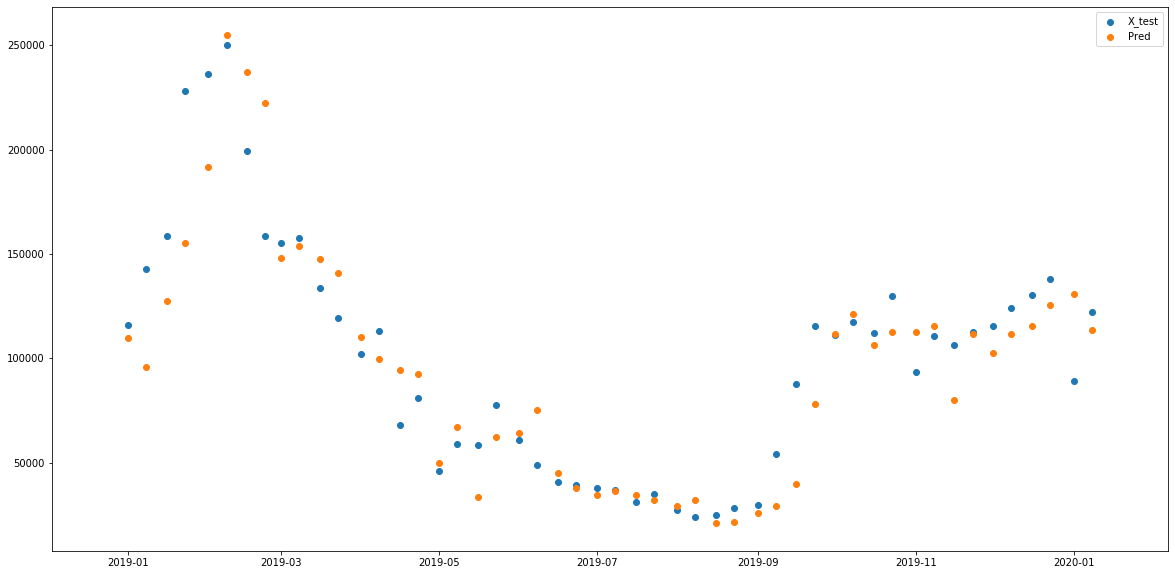

In [32]:
plt.figure(figsize=(20,10))

plt.scatter(df_test["Date"], X_test)
plt.scatter(df_test["Date"], predictions)
plt.legend(["X_test", "Pred"])

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df_train.Amount.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=11879.322, BIC=11896.451, Fit time=0.090 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=13216.089, BIC=13224.654, Fit time=0.014 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=11896.540, BIC=11909.387, Fit time=0.037 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=12704.000, BIC=12716.847, Fit time=0.212 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=13572.170, BIC=13576.452, Fit time=0.008 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=11863.680, BIC=11885.091, Fit time=0.314 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=11869.165, BIC=11886.294, Fit time=0.052 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=11821.065, BIC=11846.759, Fit time=0.329 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=11845.649, BIC=11867.060, Fit time=0.092 seconds
Fit ARIMA: order=(3

In [29]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

model = pm.auto_arima(df_train["Amount"], seasonal=True, m=52)

# make your forecasts
forecasts = model.predict(df_test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(df_train.shape[0])
plt.plot(df_train["Date"], df_train["Amount"], c='blue')
plt.plot(df_test["Date"], forecasts, c='green')
plt.show()

KeyboardInterrupt: 

In [ ]:
forecasts

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df_train["Date"][300:], df_train["Amount"][300:], c='blue')
plt.plot(df_test["Date"], df_test["Amount"], c='red')
plt.plot(df_test["Date"], forecasts, c='green')